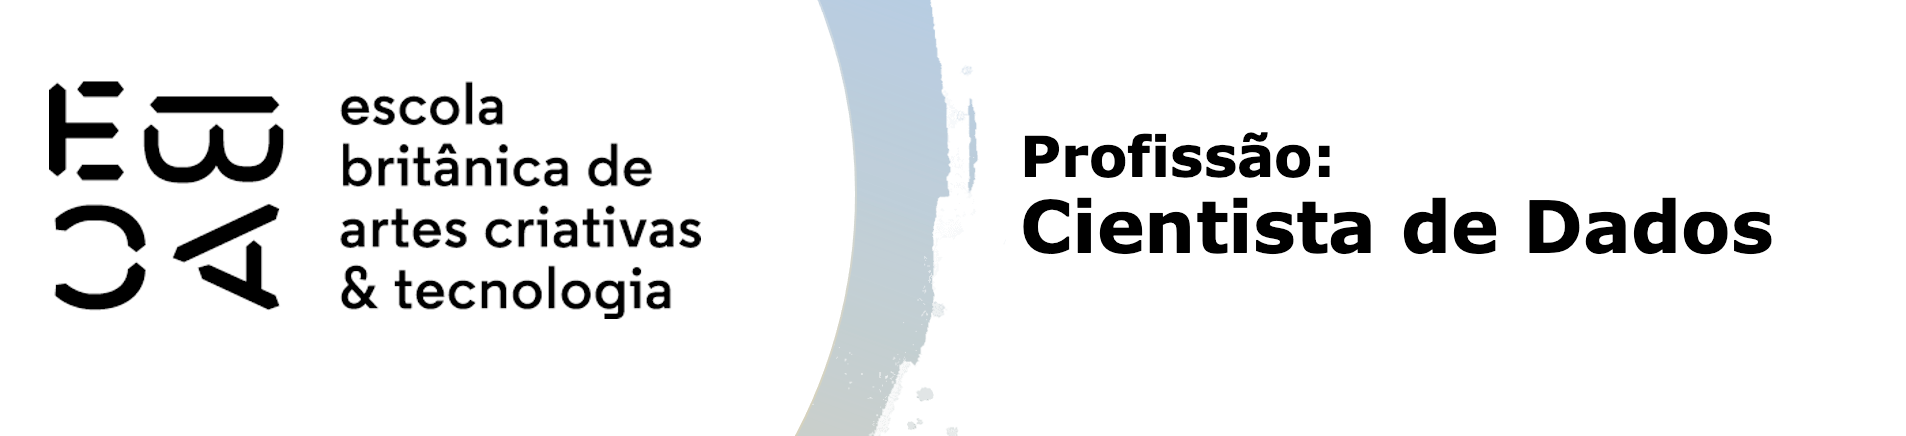

# Regressão III - Tarefa

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf


In [2]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv', index_col=1)
df['log_renda'] = np.log(df['renda'] + 1)
df.head()

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
index,,,,,,,,,,,,,,
5762,2015-01-01,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14,9.318220
1279,2015-01-01,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81,7.793921
14111,2015-01-01,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66,9.528842
8189,2015-01-01,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84,7.767620
1830,2015-01-01,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78,6.674284


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv', index_col=1)
df['log_renda'] = np.log(df['renda'] + 1)

print(f'Quantidade de valores faltantes na variável tempo de emprego: {df.tempo_emprego.isna().sum()}\nQuantidade de dados totais: {df.shape[0]}')

print(f'Quantidade de pensionistas: {df.tipo_renda[df.tempo_emprego.isna()].value_counts().iloc[0]}')

# Preenchendo valores missing com aleatórios entre -1 e -0.999
na_mask = df['tempo_emprego'].isna()
df.loc[na_mask, 'tempo_emprego'] = np.random.uniform(-1, -0.999, size=na_mask.sum())

Quantidade de valores faltantes na variável tempo de emprego: 125760
Quantidade de dados totais: 750000
Quantidade de pensionistas: 125760


É observado que os valores missing na variável `tempo_emprego` correspondem a pensionistas. Portanto, ao substituir os valores missing pela média, você estará atribuindo o tempo médio de emprego aos pensionistas. Isso pode introduzir um viés nos dados, pois os pensionistas podem ter características diferentes em relação ao tempo de emprego em comparação com os indivíduos que estão atualmente empregados. Portanto, é importante considerar o impacto dessa substituição nos resultados da análise e avaliar se essa abordagem é apropriada para o contexto específico do estudo. apropriada para o contexto específico do estudo.

Para o estudo será utilizado valores gerados aleatoriamente entre -1.000 e -0.999 na variável `tempo_emprego` 

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [4]:
df['data_ref'] = pd.to_datetime(df['data_ref'])

datas_unicas = df['data_ref'].sort_values().unique()
data_corte = datas_unicas[-3]

print(f'Data de corte (início dos 3 últimos meses): {data_corte}')

df_train = df[df['data_ref'] < data_corte]
df_test = df[df['data_ref'] >= data_corte]

print(f'Dimensões da base de treino: {df_train.shape}')
print(f'Dimensões da base de teste: {df_test.shape}')

Data de corte (início dos 3 últimos meses): 2016-01-01 00:00:00
Dimensões da base de treino: (600000, 14)
Dimensões da base de teste: (150000, 14)


### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [5]:
model = smf.ols(formula='log_renda ~ tempo_emprego', data=df_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                 3.605e+05
Date:                Mon, 08 Dec 2025   Prob (F-statistic):               0.00
Time:                        18:22:09   Log-Likelihood:            -8.2899e+05
No. Observations:              600000   AIC:                         1.658e+06
Df Residuals:                  599998   BIC:                         1.658e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.6011      0.002   5121.767      0.000       8.598       8.604
tempo_emprego     0.1079      0.000    600.430      0.000       0.108       0.108
==============================================================================
Omnibus:                      713.437   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.440
Skew:                          -0.020   Prob(JB):                    3.77e-134
Kurtosis:                       2.849   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

,log_renda,qtd_observacoes,media_tempo_emprego
tempo_emprego_vis,,,
"(-1.005, -1.0]",8.802386,37500,-0.999597
"(-1.0, -0.999]",8.790634,37500,-0.999512
"(-0.999, -0.998]",8.792903,37500,-0.999445
"(-0.998, 0.601]",8.352778,37500,-0.086543
"(0.601, 1.183]",8.187498,37500,0.902944
"(1.183, 1.861]",8.292410,37500,1.542715
"(1.861, 2.657]",8.364419,37500,2.231600
"(2.657, 3.386]",8.489183,37500,3.031680
"(3.386, 4.097]",8.582386,37500,3.746029


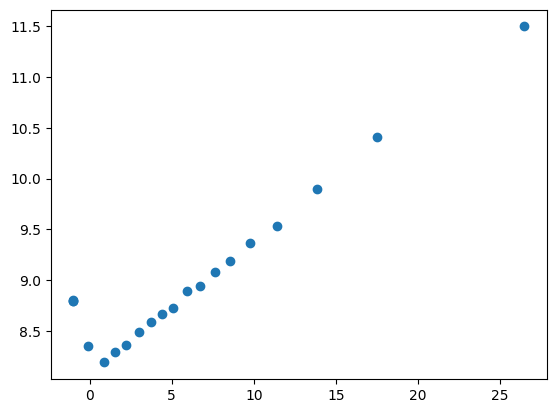

In [6]:
# Adicionando um pequeno ruído (jitter) para desempatar valores iguais
# Isso permite que o qcut crie 20 categorias com quantidades similares de observações
df['tempo_emprego_jitter'] = df['tempo_emprego'] + np.random.normal(0, 0.001, size=len(df))

df['tempo_emprego_vis'] = pd.qcut(df['tempo_emprego_jitter'], q=20)

df_vis = df.groupby('tempo_emprego_vis', observed=False)['log_renda'].mean()
df_vis = df_vis.to_frame()
df_vis['qtd_observacoes'] = df.groupby('tempo_emprego_vis', observed=False).size()
df_vis['media_tempo_emprego'] = df.groupby('tempo_emprego_vis', observed=False)['tempo_emprego'].mean()
display(df_vis)

plt.scatter(df_vis['media_tempo_emprego'], df_vis['log_renda'].values)
plt.show()

In [7]:
df_f = df_vis.copy()
df_f.rename(columns={'log_renda':'y', 'media_tempo_emprego':'X1'}, inplace=True)

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


In [8]:
def esp_vs_obs(data=df):
    pred_ols = res.get_prediction()
    iv_l = pred_ols.summary_frame()["obs_ci_lower"]
    iv_u = pred_ols.summary_frame()["obs_ci_upper"]
    
    m_l = pred_ols.summary_frame()["mean_ci_lower"]
    m_u = pred_ols.summary_frame()["mean_ci_upper"]

    fig, ax = plt.subplots(figsize=(8, 6))


    ax.plot(data.X1, data.y, "o", label="Dados observados")
    ax.plot(data.X1, data.y, "b-", label="Média dos dados", alpha=0.5)
    ax.plot(data.X1, res.fittedvalues, "r--.", label="Estimativa OLS")
    ax.plot(data.X1, iv_u, "r--", label = 'Banda de confiança para y')
    ax.plot(data.X1, iv_l, "r--")
    ax.plot(data.X1, m_u, "g:", label='Banda de confiança para a média')
    ax.plot(data.X1, m_l, "g:")
    ax.legend(loc="best")
    plt.show()

1. Transformação Linear

R-quadrado: 88.82%


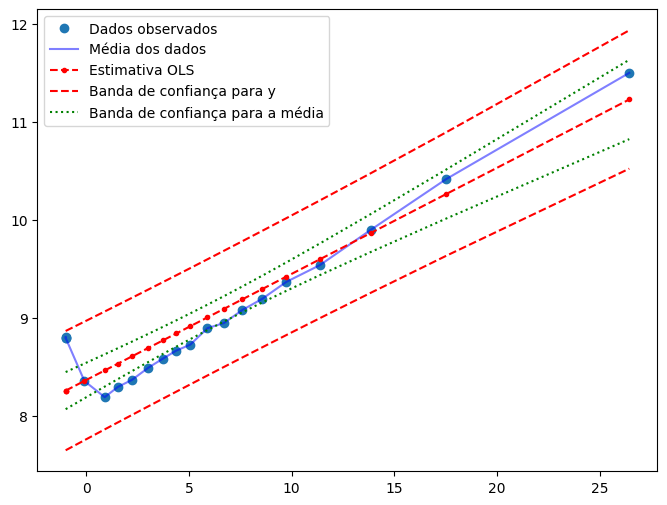

In [9]:
# res = sm.OLS(y, x).fit()
res = smf.ols('y ~ X1',data=df_f).fit()
print(f'R-quadrado: {res.rsquared:.2%}')

esp_vs_obs(df_f);

C:\Users\Admin\AppData\Local\Temp\ipykernel_1180\3345544513.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_med['y'] = df_f.groupby('X1_cat')['y'].mean()
C:\Users\Admin\AppData\Local\Temp\ipykernel_1180\3345544513.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  y_med['y_min'] = y_med.y - 2*df_f.groupby('X1_cat')['y'].sem()
C:\Users\Admin\AppData\Local\Temp\ipykernel_1180\3345544513.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and s

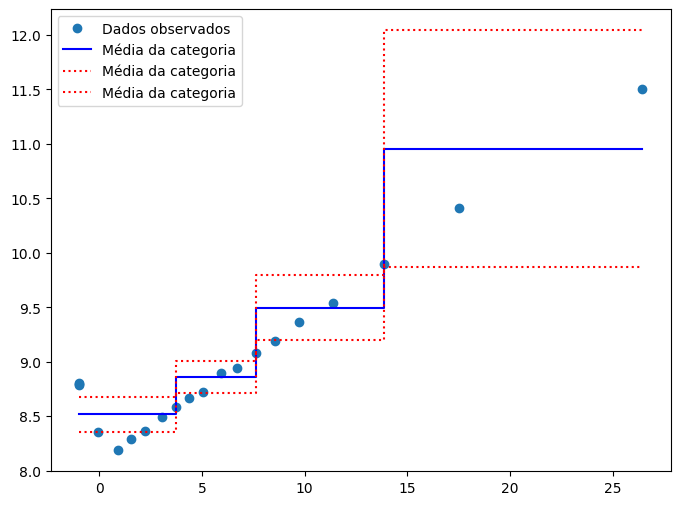

In [10]:
quebras2 = [ -np.inf,  4.,  8.,  15., 30.]

df_f['X1_cat'] = pd.cut(df_f['X1'], quebras2)

y_med = pd.DataFrame()
y_med['y'] = df_f.groupby('X1_cat')['y'].mean()
y_med['y_min'] = y_med.y - 2*df_f.groupby('X1_cat')['y'].sem()
y_med['y_max'] = y_med.y + 2*df_f.groupby('X1_cat')['y'].sem()

y_med.rename(columns={'y':'y_med'}, inplace=True)
# y_med.columns = []

tab = df_f.merge(y_med, on='X1_cat', how='left')

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(tab.X1, tab.y, "o", label="Dados observados", alpha=1)
ax.step(tab.X1, tab.y_med, "b-", label="Média da categoria", alpha=1)
ax.step(tab.X1, tab.y_min, "r:", label="Média da categoria", alpha=1)
ax.step(tab.X1, tab.y_max, "r:", label="Média da categoria", alpha=1)
ax.legend();


R-quadrado: 88.38%


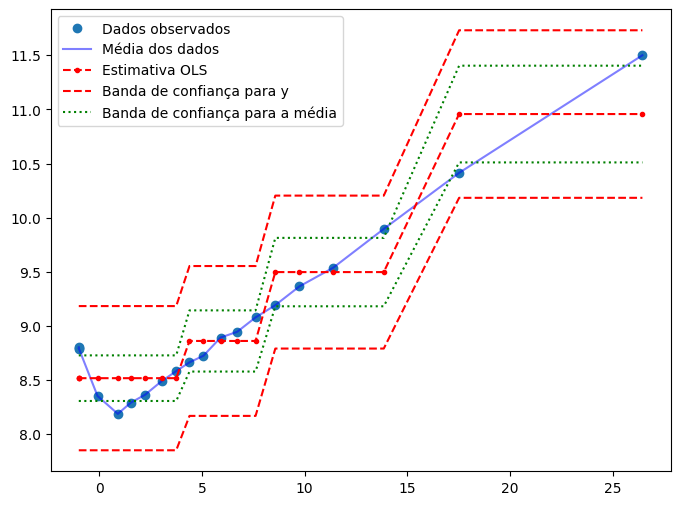

In [11]:
# res = sm.OLS(y, x).fit()
res = smf.ols('y ~ X1_cat',data=df_f).fit()
print(f'R-quadrado: {res.rsquared:.2%}')

esp_vs_obs(df_f);

R-quadrado: 96.43%


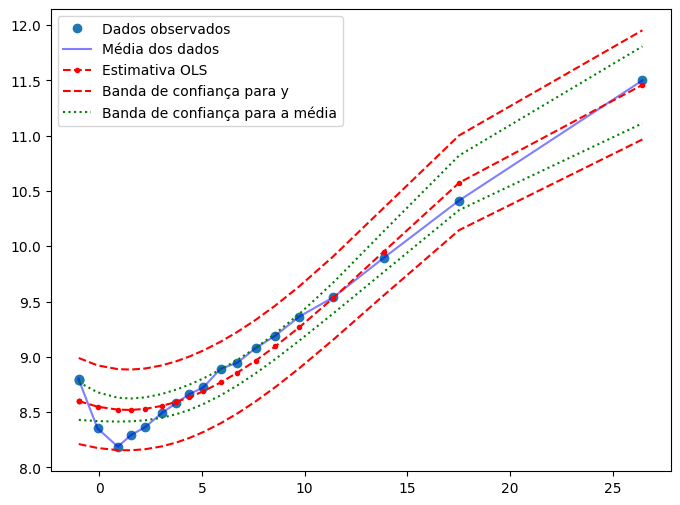

In [12]:
# res = sm.OLS(y, x).fit()
res = smf.ols('y ~ X1 + I(X1**2) + I(X1**3)',data=df_f).fit()
print(f'R-quadrado: {res.rsquared:.2%}')

esp_vs_obs(df_f);

R-quadrado: 94.74%


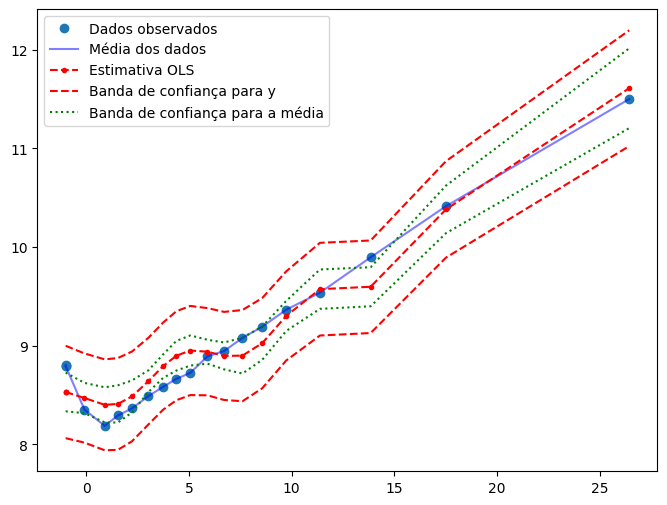

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     96.02
Date:                Mon, 08 Dec 2025   Prob (F-statistic):           1.92e-10
Time:                        18:22:10   Log-Likelihood:                 5.9896
No. Observations:                  20   AIC:                            -3.979
Df Residuals:                      16   BIC:                          0.003713
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4619      0.072    117.721      0.000       8.310       8.614
X1                0.0565      0.017      3.329      0.004       0.021       0.093
I(X1 ** 2)        0.0026      0.001      3.558      0.003       0.001       0.004
I(np.sin(X1))    -0.1458      0.059     -2.452      0.026      -0.272      -0.020
==============================================================================
Omnibus:                        4.475   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.107   Jarque-Bera (JB):                1.771
Skew:                           0.344   Prob(JB):                        0.412
Kurtosis:                       1.714   Cond. No.                         301.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# res = sm.OLS(y, x).fit()
res = smf.ols('y ~ X1 + I(X1**2) + I(np.sin(X1))',data=df_f).fit()
print(f'R-quadrado: {res.rsquared:.2%}')

esp_vs_obs(df_f);

res.summary()

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

**Análise dos Resultados:**

1.  **Modelo Linear (Baseline):** Serve como referência. Se os modelos mais complexos não superarem significativamente este $R^2$, a complexidade adicional não se justifica.
2.  **Polinômio de 2º Grau:** Captura a curvatura básica da relação entre tempo de emprego e renda (rendimentos marginais decrescentes ou crescentes). Geralmente oferece um bom ganho sobre o linear.
3.  **Polinômio de 3º Grau:** Adiciona mais flexibilidade. Se o $R^2$ de teste aumentar em relação ao 2º grau, indica que a relação é mais complexa.
4.  **Polinômio + Seno:** Tenta capturar oscilações periódicas. Se o $R^2$ de teste for pior que os anteriores, indica que as oscilações vistas no treino eram provável ruído e o modelo não generalizou bem.

**Conclusão:**
O modelo mais adequado é aquele que maximiza o $R^2$ na base de teste. Frequentemente, o **Polinômio de 2º grau** ou **3º grau** oferece o melhor equilíbrio entre ajuste e generalização para dados de renda vs tempo de emprego.